# 유동성 위험

유동성은 일반적으로 큰 가격 영향 없이 대량의 자산이 판매 가능한 상태인지를 나타내는 정도로 정의되나, 이것이 유동성의 유일한 측면은 아니다. 유동성을 매우 복잡하고 이해하기 어려운 개념이다. 따라서 이 책의 목적상 유동성을 4 가지 특성을 바탕으로 정의하고자 한다.

1. 집중도 : 집중도는 자산을 같은 가격에 동시에 거래할 수 있는 능력을 의미한다. 또한 집중도는 거래 도중 발생하는 거래 비용을 의미한다. 거래 비용이 높으면 매수-매도 스프레드가 커지며 그 반대도 성립한다. 따라서 작은 거래 비용은 높은 시장 집중도를 의미한다.

2. 즉시성 : 즉시성은 대량의 주문을 거래하는 속도를 의미한다. 이는 금융 시장에 대한 귀중한 정보를 제공한다. 낮은 즉시성은 청산 및 결제 등의 상황에서 오작동이 발생함을 뜻하기 때문이다.

3. 깊이 : 이는 다양한 가격으로 풍부한 주문을 처리할 수 있는 많은 수의 구매자와 판매자가 존재하는지를 뜻한다. 많은 거래자가 존재할 때 호가창이 길어지는 것을 생각하면 이해하기 쉽다.

4. 탄력성 : 불균형에서 회복하는 시장의 능력을 말한다. 주문 불균형이 빠르게 해소되는 가격 회복 과정으로 이해 가능하다.

하지만 각각의 정의가 상호 독립적인 것은 아님에 유의하여야 한다.

군집화 분석을 사용하면 유동성의 다차원성을 축소하여 유동성의 척도 가지수를 줄이는 데 도움이 된다. 군집화 분석을 위해서는 가우스 혼합 모델(GMM)과 가우스 혼합 코풀라 모델(GMCM, Gaussian Mixture Copula Model)을 사용할 것이다. GMCM은 상관관계를 고려하기 위해 코풀라 분석을 포함한다는 점에서 GMM의 확장이라 할 수 있다. 우선 다양한 유동성 차원에 기반해 유동성 척도를 식별하는 것부터 시작한다.

## 유동성 척도

앞서 서술했듯, 유동성은 다양한 척도를 포함한다. 따라서 거래량, 거래비용, 가격 영향, 시장 영향 4가지 차원을 이용해 유동성을 분석해 보고자 한다.

### 거래량 기반 유동성 척도

시장이 '깊을 때'. 즉 시장이 다양한 주문을 충족할 수 있는 능력이 있을 때 대규모 주문이 처리된다. 시장에 깊이가 없다면 주문 불균형과 불연속성이 나타난다. 따라서 시장의 깊이를 감안하면 거래량 기반 유동성 척도를 사용해 유동 자산과 비유동 자산을 고려할 수 있게 된다. 이 거래량 기반 유동성 척도는 매수-매도 스프레드와 강한 연관이 있다. 매수-매도 스프레드가 크면 거래량이 적고, 매수-매도 스프레드가 좁으면 거래량이 많다는 의미이다. 

유동성의 깊이 차원을 적절하게 나타내기 위해 다음과 같은 거래량 기반 척도가 개입된다.
1. 유동성 비율
2. 휘-회벨 비율
3. 회전률

#### 유동성 비율

유동성 비율은 1%의 가격 변동을 일으키는 데 필요한 거래량의 척도를 측정한다

$$ LR_{it}=\frac{\Sigma_{t=1}^T P_{it}V_{it}}{\Sigma_{t=1}^T \vert PC_{it}\vert}$$

여기서 $P_{it}$는 $t$일의 주식 $i$의 총 가격이고, $V_{it}$는 $t$일의 주식 $i$의 거래량을 나타내며, $ \vert PC_{it} \vert $는 $t$일과 $t-1$일에서의 가격 차이의 절대값을 의미한다. 이때, 비율 $LR_{it}$가 높을수록 자산 $i$의 유동성이 높아진다. 이는 높은 거래량인 $P_{it}V_{it}$와 낮은 가격차인 $ \vert PC_{it} \vert $가 높은 유동성 수준에 해당함을 의미한다. 거대한 물량이 들어와도 시장 충격이 적다는 것을 의미하기 때문이다. 반대로 가격 변경을 위해 소량이 필요한 경우는 이 자산을 비유동성이라고 한다. 이는 가격 측면에 더 중점을 둔 프레임워크다.

다음은 코드를 이용해 $LR_{it}$을 계산하는 코드이다. 여기서 주요 변수는 매수(ASKHI), 매도(BIDLO), 시가(OPENPRC)와 거래 가격(PRC), 거래량(VOL), 수익률(RET), 거래량 가중 주식 수익률(VWRETX), 발행 주식수(SHROUT)이다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('use_inf_as_na', True)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
liq_data = pd.read_csv('./datasets/bid_ask.csv')

In [4]:
liq_data.head()

,Unnamed: 0,Date,EXCHCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,vwretx
0,1031570,2019-01-02,3.0,INTC,INTEL CORP,45.77,47.470,47.08,18761673.0,0.003196,4564000.0,45.960,0.001783
1,1031571,2019-01-03,3.0,INTC,INTEL CORP,44.39,46.280,44.49,32254097.0,-0.055013,4564000.0,46.150,-0.021219
2,1031572,2019-01-04,3.0,INTC,INTEL CORP,45.54,47.570,47.22,35419836.0,0.061362,4564000.0,45.835,0.033399
3,1031573,2019-01-07,3.0,INTC,INTEL CORP,46.75,47.995,47.44,22724997.0,0.004659,4564000.0,47.100,0.009191
4,1031574,2019-01-08,3.0,INTC,INTEL CORP,46.78,48.030,47.74,22721240.0,0.006324,4564000.0,47.800,0.010240


rolling_five는 5일 동안의 매수 가격 계산과 같은 롤링 윈도우 추정을 위해 추가한 데이터이다.

In [5]:
rolling_five = []

for j in liq_data.TICKER.unique():
    for i in range(len(liq_data[liq_data.TICKER == j])):
        rolling_five.append(liq_data[i:i+5].agg({'BIDLO': 'min',
                                                'ASKHI': 'max',
                                                 'VOL': 'sum',
                                                 'SHROUT': 'mean',
                                                 'PRC': 'mean'}))

In [6]:
rolling_five_df = pd.DataFrame(rolling_five)
rolling_five_df.columns = ['bidlo_min', 'askhi_max', 'vol_sum',
                           'shrout_mean', 'prc_mean']
liq_vol_all = pd.concat([liq_data,rolling_five_df], axis=1)

In [7]:
liq_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        liq_ratio.append((liq_vol_all['PRC'][i+1:i+6] * 
                          liq_vol_all['VOL'][i+1:i+6]).sum()/
                         (np.abs(liq_vol_all['PRC'][i+1:i+6].mean() - 
                                 liq_vol_all['PRC'][i:i+5].mean())))

#### 휘-회벨 비율

휘-회벨 비율은 LHH로도 잘 알려진 유동성 비율이다.

$$L_{HH}=\frac{P_{max}-P_{min}/P_{min}}{V/(\bar{P}*shrout)}$$

여기서 $P_{max}$와 $P_{min}$은 정해진 기간 동안의 최고가와 최저가를 나타낸다. $\bar{P}$는 정해진 기간 동안의 평균 종가를 의미한다. 분자에 있는 것($P_{max}-P_{min}/P_{min}$)은 주가의 백분율 변화이며, 거래량은 시가총액으로 나눈다. 즉 $\bar{P}*shrout$은 시가총액을 의미한다. 이 방법의 장점은 포트폴리오 뿐만 아니라 단일 종목에도 적용할 수 있다는 사실이다.

다음은 휘-회벨 비율을 계산하는 코드이다.

In [8]:
Lhh = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        Lhh.append((liq_vol_all['PRC'][i:i+5].max() - 
                    liq_vol_all['PRC'][i:i+5].min()) /  
                   liq_vol_all['PRC'][i:i+5].min() /  
                   (liq_vol_all['VOL'][i:i+5].sum() / 
                    liq_vol_all['SHROUT'][i:i+5].mean() * 
                    liq_vol_all['PRC'][i:i+5].mean()))

#### 회전률

회전률은 기본적으로 발행 주식 수에 대한 거래 주식 수의 비율이다.

$$LR_{it}=\frac{1}{D_{it}} \frac{\Sigma_{t=1}^T Vol_{it}}{\Sigma_{t=1}^T shrout_{it}}$$

여기서 $D_{it}$는 거래일 수, $Vol_{it}$는 시간 t에 거래된 주식 수, $shrout_{it}$는 시간 t에 발행된 주식 수를 의미한다. Amihud와 Mandelson(1986b)에 의하면 회전률과 주식의 유동성 비용은 음의 상관관계를 가지고 있다고 한다. 

다음은 회전률을 계산하는 코드이다.

In [9]:
turnover_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        turnover_ratio.append((1/liq_vol_all['VOL'].count()) * 
                              (np.sum(liq_vol_all['VOL'][i:i+1]) / 
                               np.sum(liq_vol_all['SHROUT'][i:i+1])))

In [10]:
liq_vol_all['liq_ratio'] = pd.DataFrame(liq_ratio)
liq_vol_all['Lhh'] = pd.DataFrame(Lhh)
liq_vol_all['turnover_ratio'] = pd.DataFrame(turnover_ratio)

### 거래 비용 기반 유동성 척도

거래 비용은 투자자가 부담해야 하는 비용을 의미한다. 즉 거래의 집행과 관련된 모든 비용을 뜻한다. 거래 비용은 명시적 비용과 암묵적 비용으로 구분이 가능한데, 전자는 주문 처리, 세금 및 중계 수수료 등에 관련되어 있으며, 후자는 매수-매도 스프레드, 실행 시기 등과 같은 잠재 비용에 연관되어 있다. 높은 거래 비용은 투자자의 거래를 방해하고 이는 다시 시장의 구매자와 판매자의 수를 줄여 시장이 '얕아지게'하는 주요 원인이 된다. 또한 거래 비용이 낮고 구매자와 판매자가 풍부해지면 짧은 시간에 다량의 주문이 처리된다는 뜻이므로 즉시성과도 연관이 된다.

호가 스프레드는 거래 비용에 대한 널리 인정되는 대용품이다. 매수-매도 스프레드는 자산을 현금으로 전환하는 용이성을 결정할 수 있는 유동성의 좋은 지표이다. 

#### 명목과 유효 메수-매도 스프레드

명목 스프레드는 거래 완료 비용, 즉 매수-매도 스프레드의 차이를 측정한다. 퍼센트 명목 스프레드는 다음과 같이 계산된다.

$$퍼센트 명목 스프레드 = \frac{P_{ask}-P_{bid}}{P_{mid}}$$

여기서 $P_{ask}$는 주식의 매수 호가, $P_{bid}$는 주식의 매도 호가를 의미한다. 

유효 매수-매도 스프레드의 경우, 거래가 명목 내 또는 외에서 발생하는 경우 거래 비용을 더 정확히 측정한다고 알려져 있으며, 실제 거래 가격을 기반으로 해 백분율 기준으로 계산하는 형태를 띄고 있다.

$$유효 스프레드 = \frac{2\vert P_t-P_{mid} \vert}{P_{mid}}$$

여기서 $P_t$는 해당 주식의 거래 가격이며 $P_{mid}$는 거래 시점에 유효한 매수-메도 호가의 중간점이다.

다음은 명목 스프레드와 유효 스프레드를 계산하는 과정이다.

In [11]:
liq_vol_all['mid_price'] = (liq_vol_all.ASKHI + liq_vol_all.BIDLO) / 2
liq_vol_all['percent_quoted_ba'] = (liq_vol_all.ASKHI - 
                                    liq_vol_all.BIDLO) / \
                                    liq_vol_all.mid_price
liq_vol_all['percent_effective_ba'] = 2 * abs((liq_vol_all.PRC - 
                                               liq_vol_all.mid_price)) / \
                                               liq_vol_all.mid_price

#### Roll's Spread

##### Random walk model of security prices

시간 $t$에서 거래되는 가격 $p_t$를 가정하자. 여기서 시간 인덱스 $t$는 한 시간 간격이 될 수 있고, 일 분이 될 수도 있으며, 하루가 될 수도 있다. 이 시간을 앞으로 캘린터 타임(calander time)이라고 부르도록 한다. random walk를 따르는 가격 계열 p_t는 다음을 따른다고 가정한다.


$$
p_t = p_{t - 1} + \mu + u_t
$$

여기서 $u_t, t \in \{0,\dots, T\}$인 white noise 계열이고 iid 프로세스를 따르는 random variable이다. 직관적으로 보자면, 새로운 정보가 시장에 도달하면 가격은 변화한다. $\mu$는 시장의 기대 가격 변화 수준이다 $(E[\Delta p_t])$. 만약 시장의 기대가 가격이 상승하거나 하락하지 않는 횡보장 혹은 정적인 상태라면 $\mu = 0$이 될 것이다. 이 상황에서 가격 $p_t = p_{t-1} + u_t$이기 때문에 확률보행 과정을 따른다. 따라서 이 경우, 가격의 예측은 전혀 불가능하다(이 과정을 martingale 과정이라고 부른다).

그러나, 현실적으로 가격이 확률보행 과정을 완벽히 따르는 것은 보기 힘들다. 당장에 증권 시장에서는 판매자와 구매자 뿐만 아니라 정보 기반 거래자와 유동성 공급자, 브로커가 존재하며 중간 매개자들은 거래 유동성을 원활히 하고 매칭을 해 주는 대신 수수료를 취한다. 따라서, bid price, ask price가 동시에 존재하는 시장이다.

##### The Roll Model of bid, ask, and Transaction prices
Roll은 bid price와 ask price 사이의 중간 가격 계열 $m_t$를 고려하였다. 추세가 없는 random walk process $\{m_t\}$를 다음과 같이 가정해 보자.

$$
m_t = m_{t-1} + u_t
$$

중간 가격의 변화분 $\Delta m_t = m_t - m_{t-1}$은 정규 분포로부터 독립적이고 동일하게 추출된다.

$$
\Delta m_t \sim N(0, \sigma_u^2)
$$

관측된 가격 $\{p_t\}$는 중간 가격 계열 $\{m_t\}$에 스프레드가 더해진 순차적 거래에 대한 결과이다.

$$
p_t = m_t + b_tc
$$

여기서 $c$는 bid-ask spread의 절반이고 $b_t \in \{-1, 1\}$은 공격적인 거래자의 거래 방향(side)이다. Roll Model은 매수와 매도가 발생할 확률이 동일하고(각각 $P[b_t = 1] = P[b_t = -1] = \frac{1}{2}$), 계열 독립 $(E[b_t b_{t-1}] = 0)$이며, $E[b_tu_t] = 0$으로 가정한다. 이런 가정들 하에서 $c$와 $\sigma_u^2$의 값은 다음과 같이 도출할 수 있다.

$$
\sigma^2[\Delta p_t] = E\left[ (\Delta p_t)^2 \right] - \left(E[(\Delta p_t)] \right)^2 = 2c^2 + \sigma_u^2
$$
$$
\sigma\left[\Delta p_t, \Delta p_{t-1}\right] = - c^2
$$

위 식을 풀어 보면 spread추정량 $c = \sqrt{\max\{0, -\sigma[\Delta p_t, \Delta p_{t-1}]\}}$과 변동성 추정량 $\sigma_u^2 = \sigma^2[\Delta p_t] + 2\sigma[\Delta p_t, \Delta p_{t-1}]$의 결과를 얻을 수 있다. 즉, bid-ask spread는 가격 변화량 계열의 공분산에 대한 함수이고, 시장 미시구조적 잡음을 제거한 관측되지 않은 가격의 잡음은 관측된 잡음$(\sigma^2[\Delta p_t])$과 가격변화량 계열의 공분산의 함수$(\sigma[\Delta p_t, \Delta p_{t-1}])$이다.

Roll Model에서 추정된 spread $c$는 다음과 같은 의미를 가진다.

1. 거래 비용의 척도: Roll 모델로 추정된 스프레드는 거래를 실행할 때 발생하는 시장 참여자의 평균 거래 비용을 나타낸다. 이 비용은 주로 매수자와 매도자 사이의 정보 비대칭, 주문 실행 리스크, 시장 유동성의 부족 등으로 인해 발생한다.
2. 시장 유동성의 지표: 낮은 스프레드는 높은 시장 유동성을 의미하고, 투자자들이 상대적으로 낮은 거래 비용으로 자산을 사고파는 것이 가능함을 나타낸다. 반면, 높은 스프레드는 낮은 유동성을 나타내며, 투자자들이 더 높은 거래 비용을 부담해야 함을 의미한다. 즉, 스프레드가 벌어질 수록 시장의 불균형이 발생한다는 것을 간접적으로 알 수 있다.
3. 정보 효율성의 측정: Roll 모델의 스프레드 추정치는 시장의 정보 효율성을 간접적으로 평가하는 데 사용될 수 있다. 스프레드가 넓을수록 시장 참여자들 사이에 더 많은 정보 비대칭이 존재한다고 해석할 수 있다. 즉 스프레드가 작을수록 정보의 공개된 정도가 크다는 의미이다.

Roll Model이 강력한 또 한가지 이유는 주식시장 뿐만이 아닌 거래가 적은 Asset based Security market 혹은 real estate 거래에서도 시장 불균형의 척도로써 사용이 가능하기 때문이다. 다만, Roll Model에서도 약점은 존재하는데 거래 비용 외의 가격 변동 원인 무시, 시장의 모든 참여자가 같은 스프레드를 경험한다는 가정이 현실과 동떨어져 있다는 점이다. 또한, mid price series $\{m_t\}$가 iid 계열이라는 점도 비현실적인 가정인 것도 고려해야 한다. 하지만 시장이 효율적이고 관찰된 가격변동의 분포 확률이 정상성을 띈다고 가정하면 롤의 스프레드는 유동성에 대한 좋은 대용물이 된다.

다음은 롤의 스프레드를 계산하는 코드이다. 여기서는 공분산이 양의 값을 갖는 경우 해리스의 접근 방식을 사용하였다.

In [12]:
liq_vol_all['price_diff'] = liq_vol_all.groupby('TICKER')['PRC'].apply(lambda x:x.diff()).droplevel(0)
liq_vol_all.dropna(inplace=True)
roll = []

for j in liq_vol_all.TICKER.unique():
     for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        roll_cov = np.cov(liq_vol_all['price_diff'][i:i+5], 
                          liq_vol_all['price_diff'][i+1:i+6])
        if roll_cov[0,1] < 0:
            roll.append(2 * np.sqrt(-roll_cov[0, 1]))
        else:
             roll.append(2 * np.sqrt(np.abs(roll_cov[0, 1])))


#### Corwin and Schultz (2012)

Corwin, Schultz는 Beckers의 연구를 기반으로 고가와 저가로부터 매매 호가 스프레드 추정량을 소개했다. 그 추정량은 두 가지 원칙에 기반을 두고 있다. 첫째, 고가는 거의 항상 매도 호가에 매치되고, 저가는 매수 호가에 매치된다는 것이다. 고가 대비 저가의 비율은 근본적인 변동성과 bid-ask spread를 반영한다. 둘째, 변동성에 기인한 bid-ask 비율의 구성 요소는 두 관측값 사이에 경과한 시간에 비례해 증가한다.

Corwin, Schultz는 매매 호가 스프레드를 가격의 퍼센티지로 다음과 같이 계산할 수 있다는 것을 보였다.

$$S_t = \frac{2(e^{\alpha_t}-1)}{1+e^{\alpha_t}}$$

여기서

$$\alpha_t = \frac{\sqrt{2\beta_t} - \sqrt{\beta_t}}{3 - 2\sqrt{2}} - \sqrt{\frac{\gamma_t}{3-2\sqrt{2}}}$$
$$\beta_t = E \Big[\sum_{j=0}^1 \Big[\log \Big(\frac{H_{t-j}}{L_{t-j}} \Big) \Big]^2\Big]$$
$$\gamma_t = \Big[\log \Big(\frac{H_{t-1, t}}{L_{t-1, t}}\Big) \Big]^2$$

$H_{t-1,t}$는 두 기간에 걸친 고가이고, $L_{t-1,t}$는 두 기간에 걸친 저가이다. Corwin-Schultz의 식에서는 변동성이 보이지 않는데, 이는 고가/저가 추정량으로 대체되었기 때문이다. 이 모델로써 벡커-파킨슨 변동성을 유도할 수 있다. 이 스프레드 추정량은 중앙 집중된 주문 호가창이 없고, 거래가 경쟁 희망 매수 호가(Bids Wanted In Competition)에 의해 일어나는 회사채 시장에서 특히 유용하다. 그 결과 특성인 bid-ask spread는 moving average window에 걸쳐 반복적으로 계산한 후 Kalman Filter를 이용해 평활화할 수 있다.

다음은 코윈 슐츠 스프레드를 계산하는 방법이다.

In [13]:
gamma = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        gamma.append((max(liq_vol_all['ASKHI'].iloc[i+1], 
                          liq_vol_all['ASKHI'].iloc[i]) - 
                      min(liq_vol_all['BIDLO'].iloc[i+1], 
                          liq_vol_all['BIDLO'].iloc[i])) ** 2)
        gamma_array = np.array(gamma)

In [14]:
beta = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        beta.append((liq_vol_all['ASKHI'].iloc[i+1] - 
                     liq_vol_all['BIDLO'].iloc[i+1]) ** 2 + 
                    (liq_vol_all['ASKHI'].iloc[i] - 
                     liq_vol_all['BIDLO'].iloc[i]) ** 2)
        beta_array = np.array(beta)

In [15]:
alpha = ((np.sqrt(2 * beta_array) - np.sqrt(beta_array)) / 
       (3 - (2 * np.sqrt(2)))) - np.sqrt(gamma_array / 
                                         (3 - (2 * np.sqrt(2))))
CS_spread = (2 * np.exp(alpha - 1)) / (1 + np.exp(alpha))

In [16]:
liq_vol_all = liq_vol_all.reset_index()
liq_vol_all['roll'] = pd.DataFrame(roll)
liq_vol_all['CS_spread'] = pd.DataFrame(CS_spread)

### Price Based Measures

여기서는 가격이 거래량과 회전률에 대해 민감한 정도를 측정할 수 있는 가격 영향 기반 유동성 측정 방법론을 소개한다. 만일 시장이 새로운 질서(주문)에 빠르게 반응해 시장의 불균형이 바로잡힌다면 해당 시장은 탄력적인 시장이 된다. 따라서 거래량 또는 회전율이 주어질 때 높은 가격 조정이 이뤄지는 경우 높은 탄력성을 의미하며, 그 반대도 성립힌다.

여기서는 세가지 가격 영향 기반 유동성 측정 방법론을 소개한다.

1. 아미후드의 비유동성 추정
2. 플로락키스, 안드로스, 알렉산드로스의 가격 영향 비율
3. 거래 탄력성 계수

#### Amihud의 비유동성

Amihud(2002)는 절대 수익률과 비유동성 사이의 양의 관계를 연구했다. 그는 거래량의 1달러에 연관된 일별 가격 반응을 계산한 값이 가격 충격의 대리 척도라고 주장했다. 이 아이디어를 구현하는 방법 중 하나는 다음과 같다

$$ILLIQ=\frac{1}{D_{it}} \Sigma_{d=1}^{D_it}\frac{\vert R_{itd}\vert}{V_{itd}}$$

여기서 $R_{itd}$는 t월 d일의 주식 수익률, $V_{itd}$는 t월 d일의 달러 거래량, $D$는 t월 관찰 일수이다.

아미후드 측정은 가격 영향을 포착하기 위해 일일 거래량 대비 수익 비율의 절대값을 사용하는 간단한 구성을 가지고 있고, 이 측정값은 예상 주가 수익률과 강한 양의 관계를 가지고 있다는 장점이 있다.

다음은 아미후드 비유동성 측정 방법을 구현한 코드이다.

In [17]:
dvol = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        dvol.append((liq_vol_all['PRC'][i:i+5] *
                     liq_vol_all['VOL'][i:i+5]).sum())
liq_vol_all['dvol'] = pd.DataFrame(dvol)

In [18]:
amihud = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        amihud.append((1 / liq_vol_all['RET'].count()) * 
                      (np.sum(np.abs(liq_vol_all['RET'][i:i+1])) / 
                              np.sum(liq_vol_all['dvol'][i:i+1])))

#### 플로락키스, 안드로스, 알렉산드로스의 가격 영향 비율

플로락키스, 안드로스, 알렉산드로스는 아미후드 비유동성 비율을 개선하는 것을 목표로 하고 새로운 유동성 척도인 수익률 대 회전률(RtoTR) 비율을 제시하였다. 저자가 제사한 아미후드 측정의 단점은 다음과 같다.

1. 시가총액이 다른 주식 간의 비교가 어렵다.

2. 투자자의 보유 기간을 무시한다.

이를 보완하는 RtoTR은 다음과 같은 구조를 지닌다.

$$RtoTR = \frac{1}{D_{it}}\Sigma_{d=1}^{D_it}\frac{\vert R_{itd} \vert}{TR_{itd}}$$

여기서 $TR_{itd}$는 t월 d일의 i의 turnover ratio를 의미한다.

다음은 플로락키스, 안드로스, 알렉산드로스의 가격 영향 비율을 게산하는 코드이다.

In [19]:
florackis = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        florackis.append((1 / liq_vol_all['RET'].count()) * 
                         (np.sum(np.abs(liq_vol_all['RET'][i:i+1]) / 
                                 liq_vol_all['turnover_ratio'][i:i+1])))

In [20]:
liq_vol_all['vol_diff_pct'] = (liq_vol_all.groupby('TICKER')['VOL']\
                              .apply(lambda x: x.diff()).pct_change()).droplevel(0)
liq_vol_all['price_diff_pct'] = (liq_vol_all.groupby('TICKER')['PRC']\
                              .apply(lambda x: x.diff()).pct_change()).droplevel(0)

#### 거래의 탄력성 계수

거래의 탄력성 계수(CET, Coefficient of Elasticity of Trading)는 단위 시간당 거래 수 및 주문과 같은 시간 관련 유동성 측정의 단점을 보완하기 위해 만들어진 측정 지표이다. 이 척도는 시장의 즉각성이 유동성 수준에 영향을 미치는 정도를 평가하기 위해 사용된다.

시장 즉각성과 CET는 거래량의 가격 탄력성을 측정하기 때문에 함께 사용되며, 가격이 거래량에 반응하는 경우, 즉 탄력적이라면 더 큰 수준의 시장 즉각성을 의미한다.

$$CET=\frac{ \% \Delta V}{ \% \Delta P}$$

여기서 $\% \Delta V$는 거래량의 퍼센트 변화율을 나타내며, $\% \Delta P$는 가격의 퍼센트 변화율을 나타낸다. 다음은 CET를 구현한 코드이다.

In [21]:
cet = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        cet.append(np.sum(liq_vol_all['vol_diff_pct'][i:i+1])/
                   np.sum(liq_vol_all['price_diff_pct'][i:i+1]))

In [22]:
liq_vol_all['amihud'] = pd.DataFrame(amihud)
liq_vol_all['florackis'] = pd.DataFrame(florackis)
liq_vol_all['cet'] = pd.DataFrame(cet)

## Market Impact Measures

미지의 정보가 투자자를 오도하고 의도치 않은 결과를 초래할 수 있다는 점에서 시장 데이터에서 정보 출처를 식별하는 것은 매우 중요한 일이다. 예컨데 시장에서 발생하는 가격 급등은 개별 주식에서 발생하는 것과 동일한 정보를 제공하지 않는다. 즉 가격 움직임을 적절하게 포착하는 방식으로 새로운 정보 소스를 식별해야 한다.

이를 위해 CAPM을 바탕으로 체계적 위험과 비체계적 위험을 구분한다. CAPM의 기울기 계수는 체계적 위험을 나타내며, 비체계적 위험은 시장 위험이 제거되는 한 개별 주식에 귀속된다.

휘-회벨은 다음 접근 방식을 사용한다.

$$R_i=\alpha+\beta R_m +u_i$$

여기서 $R_i$는 i번째 주식의 일별 수익률이고, $u_i$는 비체계적 위험이다.

이를 바탕으로 잔차 $u_i$를 추정한 뒤 거래량 $V_i$에 대해 회귀분석하면 $V_i$의 계수는 고유 위험이라고도 하는 관련 주식 유동성의 수준을 보여준다.

$$u_i^2=\gamma _1+\gamma _2 V_i + e_i$$

여기서 $u_i^2$은 잔차 제곱 항을 나타내고 $V_i$는 거래량의 일 백분율 변화를 나타낸다. 그리고 $e_i$는 잔차 항이다. $\gamma _2$가 커질수록 더 큰 가격 움직임을 의미하며, 이는 주식의 유동성에 대한 정보를 제공한다. $\gamma _2$가 작을수록 주어지는 거래량 변화에 대한 비체계적 위험의 변화가 크지 않다는 의미이므로 유동성 수준이 높아진다는 사실을 알 수 있다.

다음은 해당 내용을 계산하는 코드이다.

In [23]:
import statsmodels.api as sm

In [24]:
liq_vol_all['VOL_pct_change'] = (liq_vol_all.groupby('TICKER')['VOL']\
                                .apply(lambda x: x.pct_change())).droplevel(0)
liq_vol_all.dropna(subset=['VOL_pct_change'], inplace=True)
liq_vol_all = liq_vol_all.reset_index()

In [25]:
unsys_resid = []

for i in liq_vol_all.TICKER.unique():
    X1 = liq_vol_all[liq_vol_all['TICKER'] == i]['vwretx']
    y = liq_vol_all[liq_vol_all['TICKER'] == i]['RET']
    ols = sm.OLS(y, X1).fit()
    unsys_resid.append(ols.resid)

In [26]:
market_impact = {}

for i, j in zip(liq_vol_all.TICKER.unique(), 
                range(len(liq_vol_all['TICKER'].unique()))):
    X2 = liq_vol_all[liq_vol_all['TICKER'] == i]['VOL_pct_change']
    ols = sm.OLS(unsys_resid[j] ** 2, X2).fit()
    print('***' * 30)
    print(f'OLS Result for {i}')
    print(ols.summary())
    market_impact[j] = ols.resid

******************************************************************************************
OLS Result for INTC
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              46.31
Date:                Mon, 25 Nov 2024   Prob (F-statistic):                    7.53e-11
Time:                        14:16:39   Log-Likelihood:                          1444.9
No. Observations:                 249   AIC:                                     -2888.
Df Residuals:                     248   BIC:                                     -2884.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
         

In [27]:
market_impact[2]

498   -0.000010
499    0.000085
500   -0.000116
501    0.000110
502   -0.000018
         ...   
742    0.000283
743   -0.000325
744   -0.000122
745   -0.000078
746    0.000074
Length: 249, dtype: float64

In [28]:
append1 = pd.concat([market_impact[0], market_impact[1], market_impact[2]])
liq_vol_all['market_impact'] = append1

이제 현재까지 다뤄 본 모든 유동성 측정의 요약 통계량을 확인해보자.

In [29]:
cols = ['vol_diff_pct', 'price_diff_pct', 'price_diff',
        'VOL_pct_change', 'dvol', 'mid_price']
liq_measures_all = liq_vol_all.drop(liq_vol_all[cols], axis=1)\
                   .iloc[:, -11:]
liq_measures_all.dropna(inplace=True)
liq_measures_all.describe().T

,count,mean,std,min,25%,50%,75%,max
liq_ratio,741.0,7.345345e+10,2.564075e+11,8.065402e+08,1.378496e+10,2.246370e+10,4.505784e+10,3.095986e+12
Lhh,741.0,3.335045e-05,5.361384e-05,3.966368e-06,1.694354e-05,2.347416e-05,3.558960e-05,5.824148e-04
turnover_ratio,741.0,6.506408e-03,2.847019e-03,1.916371e-03,4.897990e-03,5.773747e-03,7.501507e-03,2.542853e-02
percent_quoted_ba,741.0,1.573169e-02,7.661742e-03,3.779877e-03,1.042547e-02,1.383334e-02,1.884734e-02,5.545110e-02
percent_effective_ba,741.0,8.402952e-03,7.169152e-03,0.000000e+00,3.034390e-03,6.857143e-03,1.159577e-02,4.656669e-02
roll,741.0,8.179523e-01,6.057095e-01,7.615773e-02,4.574986e-01,6.924305e-01,1.011879e+00,4.178873e+00
CS_spread,741.0,3.305655e-01,1.264866e-01,1.773438e-40,2.444225e-01,3.608008e-01,4.188028e-01,5.877726e-01
amihud,741.0,2.818880e-15,2.406168e-15,0.000000e+00,1.117729e-15,2.256839e-15,3.804785e-15,1.320828e-14
florackis,741.0,2.307310e-03,1.584775e-03,0.000000e+00,1.059446e-03,2.023227e-03,3.333448e-03,7.970015e-03
cet,741.0,-1.143221e+00,3.327492e+01,-4.575246e+02,-1.850822e-01,5.568888e-01,1.660166e+00,1.845917e+02


In [30]:
liq_measures_all

,liq_ratio,Lhh,turnover_ratio,percent_quoted_ba,percent_effective_ba,roll,CS_spread,amihud,florackis,cet,market_impact
0,1.645772e+10,0.000021,0.010265,0.043604,0.028568,0.540685,3.352686e-01,1.311604e-14,0.007970,-8.434177,0.000250
1,3.009959e+10,0.000025,0.006586,0.026281,0.002850,0.163768,5.613639e-01,1.103661e-15,0.000943,5.449201,0.000325
2,3.188778e+10,0.000021,0.006585,0.026369,0.014134,0.288305,2.358056e-01,1.539213e-15,0.001280,-2.749186,0.000049
3,2.216355e+11,0.000016,0.006534,0.016399,0.006850,0.381759,4.675817e-01,1.374977e-15,0.001154,-457.524621,0.000010
4,2.691051e+11,0.000014,0.007879,0.025817,0.022070,0.656689,3.120643e-01,2.871582e-15,0.001939,-26.437626,-0.000124
...,...,...,...,...,...,...,...,...,...,...,...
742,8.065402e+08,0.000014,0.001916,0.007475,0.001998,0.702766,3.252777e-01,1.148436e-15,0.002114,0.970997,0.000283
743,1.355517e+09,0.000582,0.003490,0.004856,0.001004,4.156316,2.158096e-01,1.260412e-15,0.002637,-1.017368,-0.000325
744,1.652400e+09,0.000439,0.004281,0.006504,0.000591,4.178873,2.749787e-01,5.219459e-16,0.001354,1.359067,-0.000122
745,1.968607e+09,0.000360,0.003874,0.020911,0.016281,4.171225,4.506601e-01,7.347611e-16,0.002635,0.546815,-0.000078


## GMM

유동성 측정으로 구성된 데이터는 다차원을 가지고 있다. 즉, 여러 높은 확률이 존재하며 전체에 대해 잘 적합되는 모델을 찾아야 한다. 요약하자면, 모든 유동성 척도를 포함하는 하나의 데이터 셋을 획득하였다. 하지만 우리가 데이터에 대한 레이블을 모른다고 가정하면 우리는 레이블을 모른 채 다양한 분포를 분류할 수 있는 모델이 필요하다. 이 모델이 바로 GMM이다.

어떤 유동성 데이터를 쓰냐에 따라 전혀 다른 결과가 나온다. 예를 들어 trading volume과 spread는 둘 모두 시장에 정보가 개입하였을 때 양의 상관관계를 갖는다. 하지만 trading volume이 높으면 일반적으로 유동성이 높다고 여겨지고, spread가 높다면 유동성이 낮다고 여겨진다. 즉 동일한 상황에 대해 두 전혀 상반된 지표가 일치하는 결과를 산출한다는 의미이다. 다른 예시로는 price volatility가 있는데, price volatility는 liquidity가 높아도 낮고, liquidity가 매우 부족해도 낮다. 따라서 시장의 깊이를 확인하기 위해서는 유동성의 다양한 측면에 초점을 맞춰야 한다. GMM은 이를 해결하기 위한 좋은 도구이다.

간단히 서술하자면 시장이 높은 변동성과 일치하는 호황기를 경험하고 있다면 거래량과 거래 비용에 기반한 평가가 좋은 선택이 될 것이며, 시장에 가격 불연속성이 존재한다면 가격 기반 평가가 최적의 선택이 될 것이다. 즉, 측정된 유동성 측도를 혼합하여 전체적인 유동성을 평가하는 것이 더 잘 작동할 가능성이 존재한다.

반데르플라스에 따르면 K-Mean이 효율적으로 작동하려면 클러스터 모델이 원형 특성을 가져야 하나, 많은 재무 변수는 K-mean 모델을 이용해 모델링 하기 어려운 비원형 모양을 나타낸다. 따라서 확률적 특성을 가진 GMM은 이런 데이터를 모델링하기 위한 좋은 수단이 된다.

#### 가우시안 혼합모형(Gaussian Mixture Model)

$K$-클래스 카테고리 확률변수 $Z$가 있다고 하자. 확률분포함수는 다음과 같다.

$$ p(z=k) = \pi_k $$

실수값을 출력하는 확률변수 $X$는 확률변수 $Z$의 표본값 $k$에 따라 기댓값 $\mu_k$, 분산 $\Sigma_k$이 달라진다.

$$ p(x \mid z) = \mathcal{N}(x\mid \mu_k, \Sigma_k) $$

이를 결합하면

$$ p(x) = \sum_Z p(z)p(x\mid z) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x \mid \mu_k, \Sigma_k) $$

이 된다.

실수값을 출력하는 확률변수 $X$가 $K$-클래스 카테고리 확률변수 $Z$의 값에 따라 다른 기댓값과 분산을 가지는 복수의 가우시안 정규분포들로 이루어진 모형을 가우시안 혼합(Gaussian Mixture) 모형이라고 한다.

단 가우시안 혼합모형에서 카테고리 확률변수 $Z$의 값을 알 수가 없다. 즉 관측되지 않는다고 가정한다. 이렇게 관측 데이터가 보이지 않는, 즉 내부에 숨겨진(latent) 확률 변수를 포함하는 모형을 잠재변수모형(latent variable model)이라고 한다. 잠재변수는 혼합모형처럼 카테고리값이 될 수도 있고 다른 모형에서는 실수값도 될 수 있다.

#### GMM의 모수 추정 방법

데이터로부터 가우시안 혼합모형의 모수를 추정한다는 것은 관측되지 않는 카테고리 분포의 확률분포와 각각의 카테고리에서의 가우시안 정규분포 모수를 모두 추정하는 것을 말한다. 이 때 어려운 점은 확률분포함수가 선형대수 방법으로 쉽게 구할 수 없는 복잡한 형태를 가진다는 점이다. 

$N$개의 데이터에 대한 $X$의 확률분포는 

$$ p(x) = \prod_{i=1}^N p(x_i) = \prod_{i=1}^N \sum_{z_i} p(x_i,z_i) = \prod_{i=1}^N \sum_{z_i} p(z_i)p(x_i\mid z_i)  = \prod_{i=1}^N \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k) $$

이고 로그를 취하면

$$  \log p(x) = \sum_{i=1}^N \log \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k) \right) $$

이다. 두 식 모두 미분값이 0이 되는 모수값을 쉽게 구할 수 없다.

만약 데이터 $x_i$가 어떤 카테고리 $z_i$에 속하는지를 안다면 같은 카테고리에 속하는 데이터만 모아서 카테고리 확률분포 $\pi_k$도 알 수 있고 가우시안 정규분포의 모수 $\mu_k, \Sigma_k$도 쉽게 구할 수 있을 것이다. 하지만 실제로는 데이터 $x_i$가 가지고 있는 카테고리 값 $z_i$를 알 수가 없기 때문에 위  확률분포함수 $p(x)$를 최대화하는 $\pi_k$와 $\mu_k, \Sigma_k$를 비선형 최적화를 통해 구해야 한다.

이를 위해 사용하는 방법이 바로 EM(Expectation-Maximization) 알고리즘이다. 

혼합모형의 모수추정에서 중요한 역할을 하는 것 중의 하나가 바로 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률 $p(z\mid x)$ 값이다. 이 값을 responsibility라고 한다.

$$ 
\pi_{ik} \newline \newline
$$

$$
= p(z_i=k\mid x_i) \newline \newline
$$

$$
= \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{p(x_i)} \newline
$$

$$
= \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(x_i,z_i=k)} \newline
$$

$$
= \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i\mid z_i=k)} 
$$

가우시안 혼합모형의 경우 다음과 같이 정리할 수 있다. 

$$ 
\pi_{ik} = \dfrac{\pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k)}{\sum_{k=1}^K \pi_k \mathcal{N}(x_i\mid \mu_k, \Sigma_k)} 
$$


이 식은 모수로부터 responsibility를 추정한다.

$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\; \pi_{ik} $$


$\pi_{ik}$는 $i$번째 데이터 $x_i$가 카테고리 $k$에서 만들어졌을 확률을 나타낸다.

이제 로그-결합확률분포함수를 최대화한다.

우선 $\mu_k$로 미분하여 0이 되도록 하는 방정식을 만들면 다음과 같다.

$$ 0 = - \sum_{i=1}^N \dfrac{p(z_i=k)p(x_i\mid z_i=k)}{\sum_{k=1}^K p(z_i=k)p(x_i\mid z_i=k)} \Sigma_k (x_i - \mu_k ) $$

이를 정리하면,

$$ \sum_{i=1}^N \pi_{ik} (x_i - \mu_k ) = 0$$

$$ \mu_k = \dfrac{1}{N_k} \sum_{i=1}^N \pi_{ik} x_i $$

위 식에서 
$$ N_k = \sum_{i=1}^N \pi_{ik} $$

이고 $k$ 카테고리에 속하는 데이터의 수와 비슷한 의미를 가진다. 즉 $\mu_k$는 $k$카테고리에 속하는 데이터의 샘플 평균과 같의 의미이다.

마찬가지로 로그-결합확률분포함수를 $\Sigma_k$로 미분하여 최대화하는 모수값을 구하면 다음과 같다.

$$ \Sigma_k = \dfrac{1}{N_k} \sum_{i=1}^N \pi_{ik} (x_i-\mu_k)(x_i-\mu_k)^T $$


마지막으로 로그-결합확률분포함수를 $\pi_k$로 미분하여 최대화하는 모수값을 구해야 하는데 이 때 카테고리값의 모수가 가지는 제한 조건으로 인해 Lagrange multiplier 를 추가해야 한다.

$$ \log p(x) + \lambda \left(\sum_{k=1}^K \pi_k - 1 \right) $$


이를 $\pi_k$로 미분하여 0이 되는 값을 찾으면 다음과 같다.

$$ \pi_k = \dfrac{N_k}{N} $$


이 세가지 식은 모두 responsibility로부터 모수를 구하고 있다.

$$ \pi_{ik} \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k ) $$


원래는 연립방정식의 해를 구하는 방법으로 responsibility를 포함한 모수값을 추정해야 한다. 그러나 만약 식의 형태가 responsibility를 알고 있다면 모수를 추정하는 것이 간단하도록 만들어져 있기 때문에 EM(Expectation-Maximization)이라고 하는 iterative 방법을 사용하면 연립방정식의 해를 구하는 것보다 더 쉽게 모수를 추정할 수 있다.

EM 방법은 모수와 responsiblity를 번갈아 추정하며 정확도를 높여가는 방법이다.

* E step 에서는 우리가 현재까지 알고 있는 모수가 정확하다고 가정하고 이를 사용하여 각 데이터가 어느 카테고리에 속하는지 즉, responsiblity를 추정한다.

$$ (\pi_k, \mu_k, \Sigma_k) \;\; \implies \;\; \pi_{ik} $$

* M step 에서는 우리가 현재까지 알고 있는 responsibility가 정확하다고 가정하고 이를 사용하여 모수값을 추정한다.

$$ \pi_{ik} \;\; \implies \;\; (\pi_k, \mu_k, \Sigma_k)  $$

이를 반복하면 모수와 responsibility를 동시에 점진적으로 개선할 수 있다.


각각의 데이터에 대해 responsibility을 알게되면 responsibility가 가장 큰 카테고리를 찾아내어 그 데이터가 어떤 카테고리에 속하는지를 알 수 있다. 즉 클러스터링을 할 수 있다.

$$ k_i = \arg\max_{k} \pi_{ik} $$

사실 K-means clustering은 EM 방법의 특수한 경우라고 볼 수 있다.

다음은 파이썬을 이용하여 GMM을 구현하는 과정이다.

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [32]:
liq_measures_all2 = liq_measures_all.dropna()
scaled_liq = StandardScaler().fit_transform(liq_measures_all2)

우선 각 유동성 척도를 plot하여 데이터 분포를 확인해본다

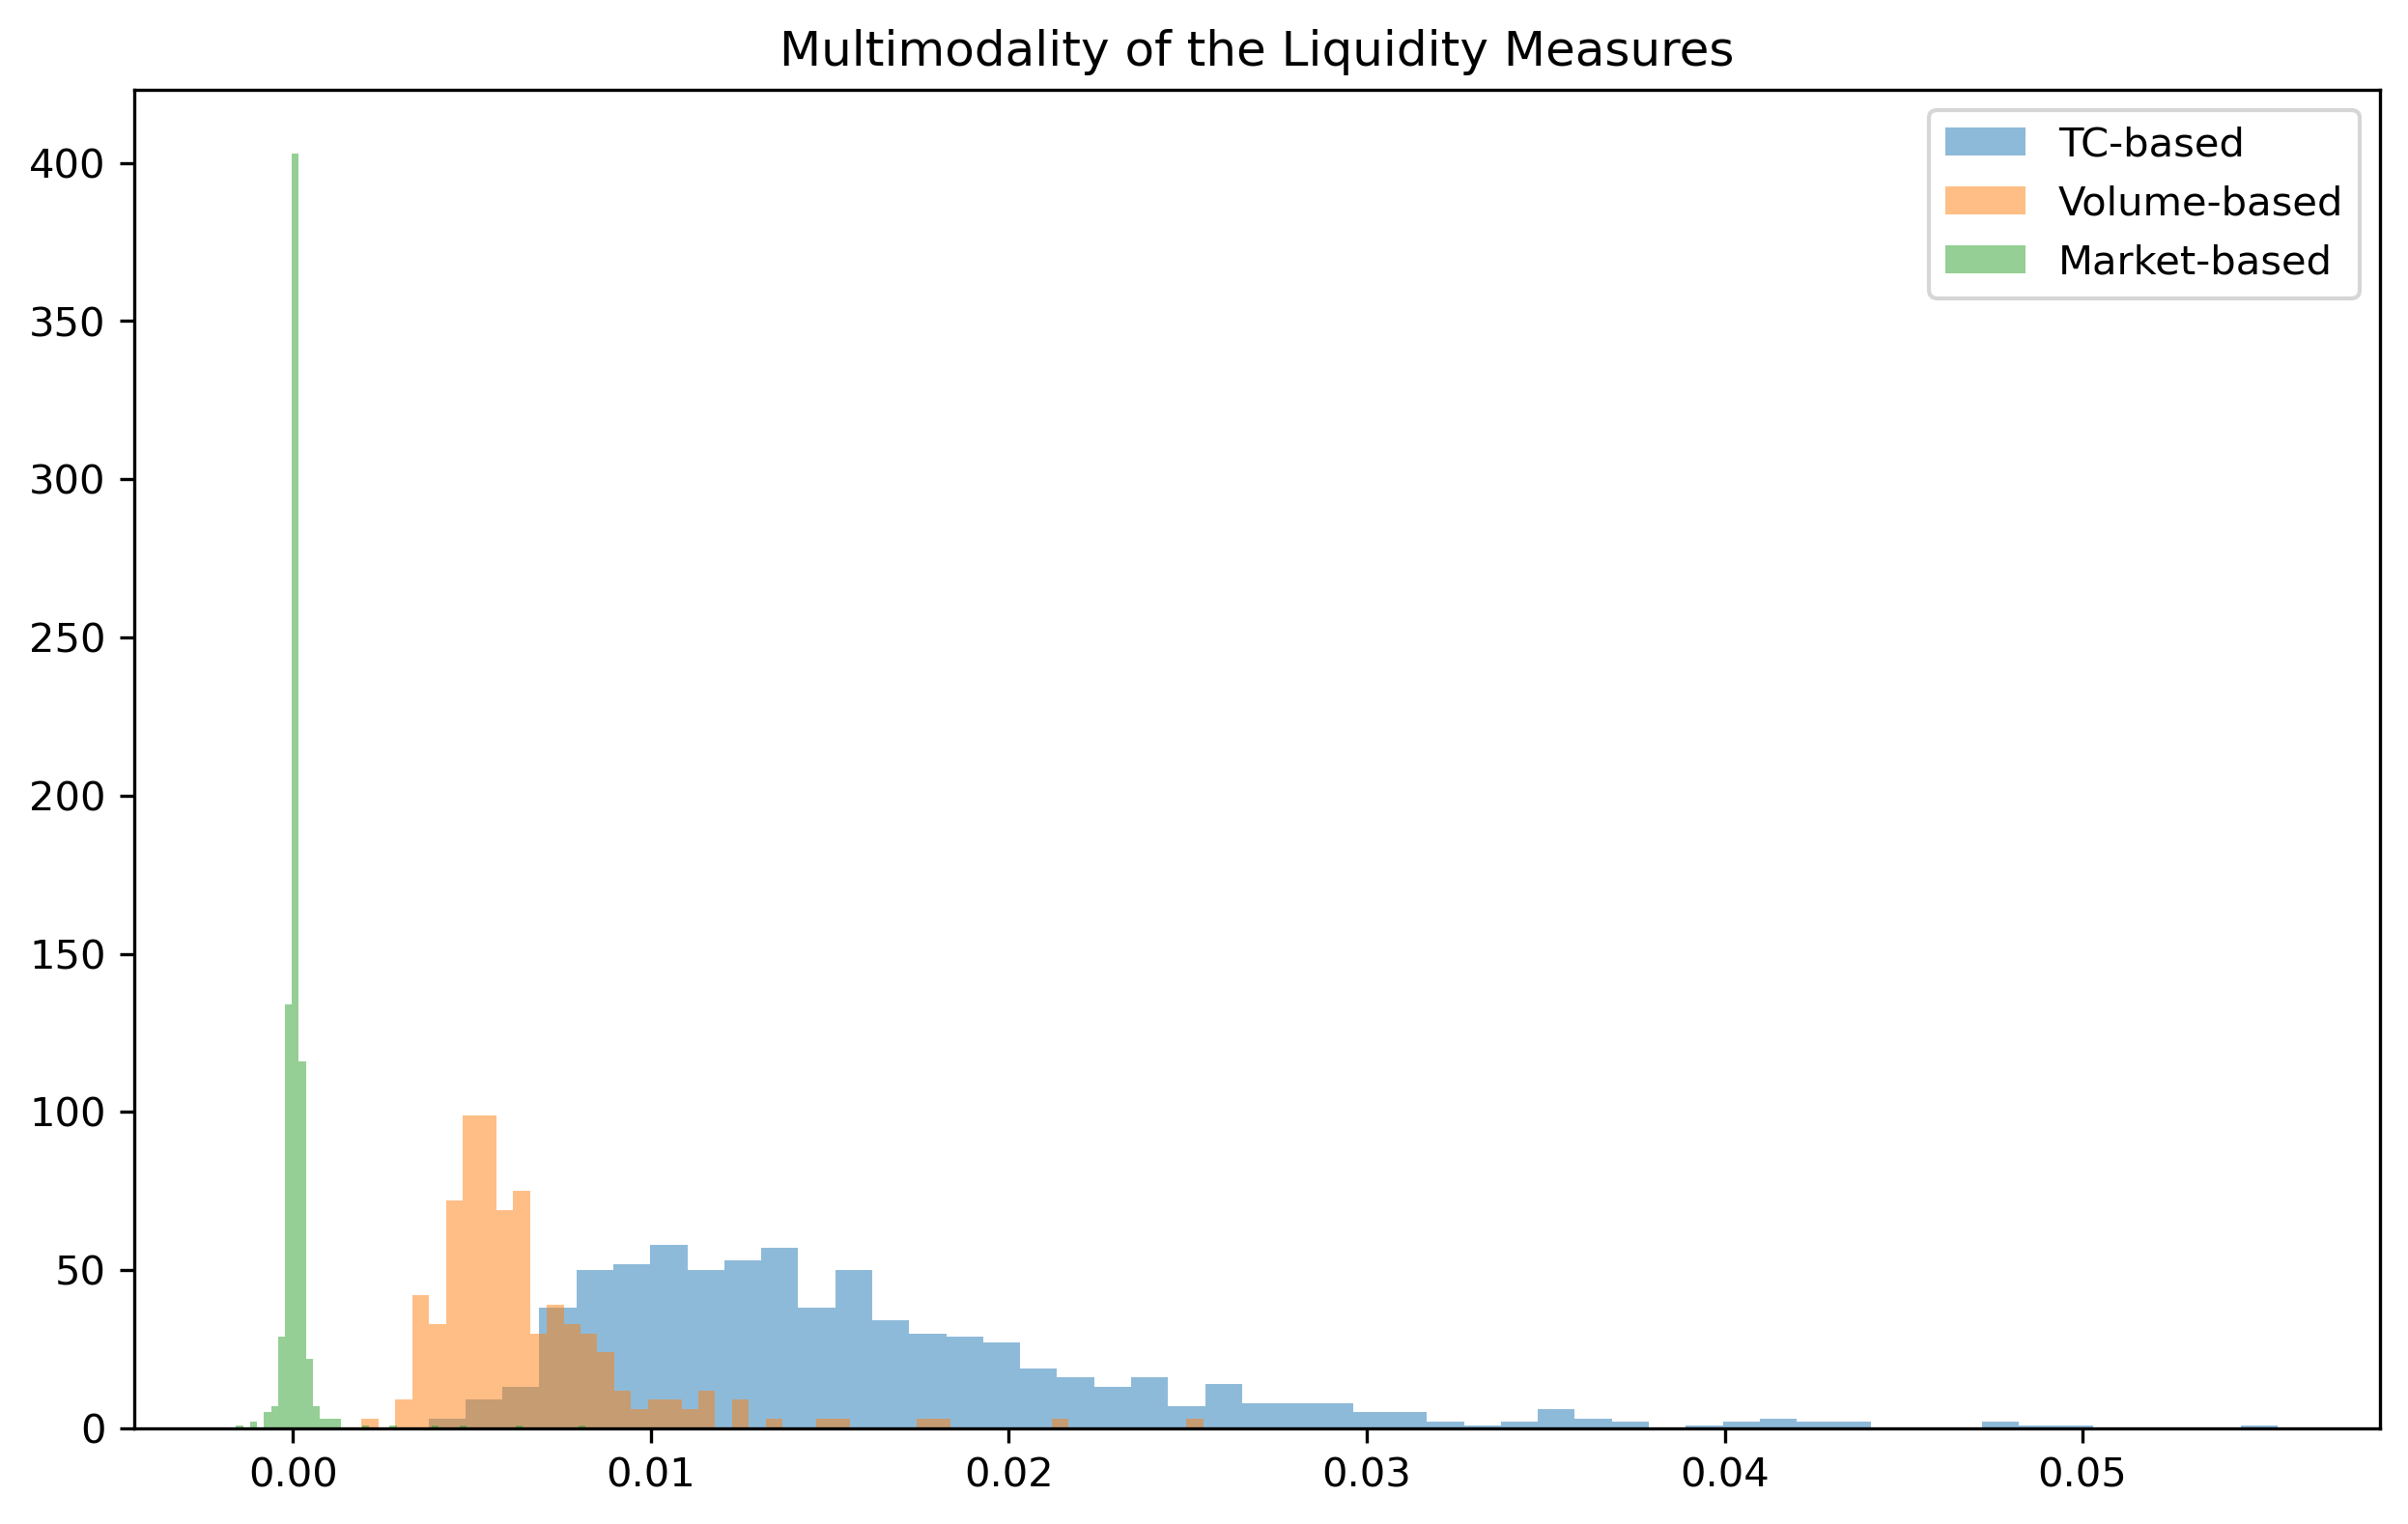

In [33]:
kwargs = dict(alpha=0.5, bins=50,  stacked=True)
plt.hist(liq_measures_all.loc[:, 'percent_quoted_ba'],
         **kwargs, label='TC-based')
plt.hist(liq_measures_all.loc[:, 'turnover_ratio'],
         **kwargs, label='Volume-based')
plt.hist(liq_measures_all.loc[:, 'market_impact'],
         **kwargs, label='Market-based')
plt.title('Multimodality of the Liquidity Measures')
plt.legend()
plt.show()

이후 클러스터링을 위해 최적의 클러스터 수를 찾는 작업을 시작한다. 우선 BIC 지수를 이용해본다.

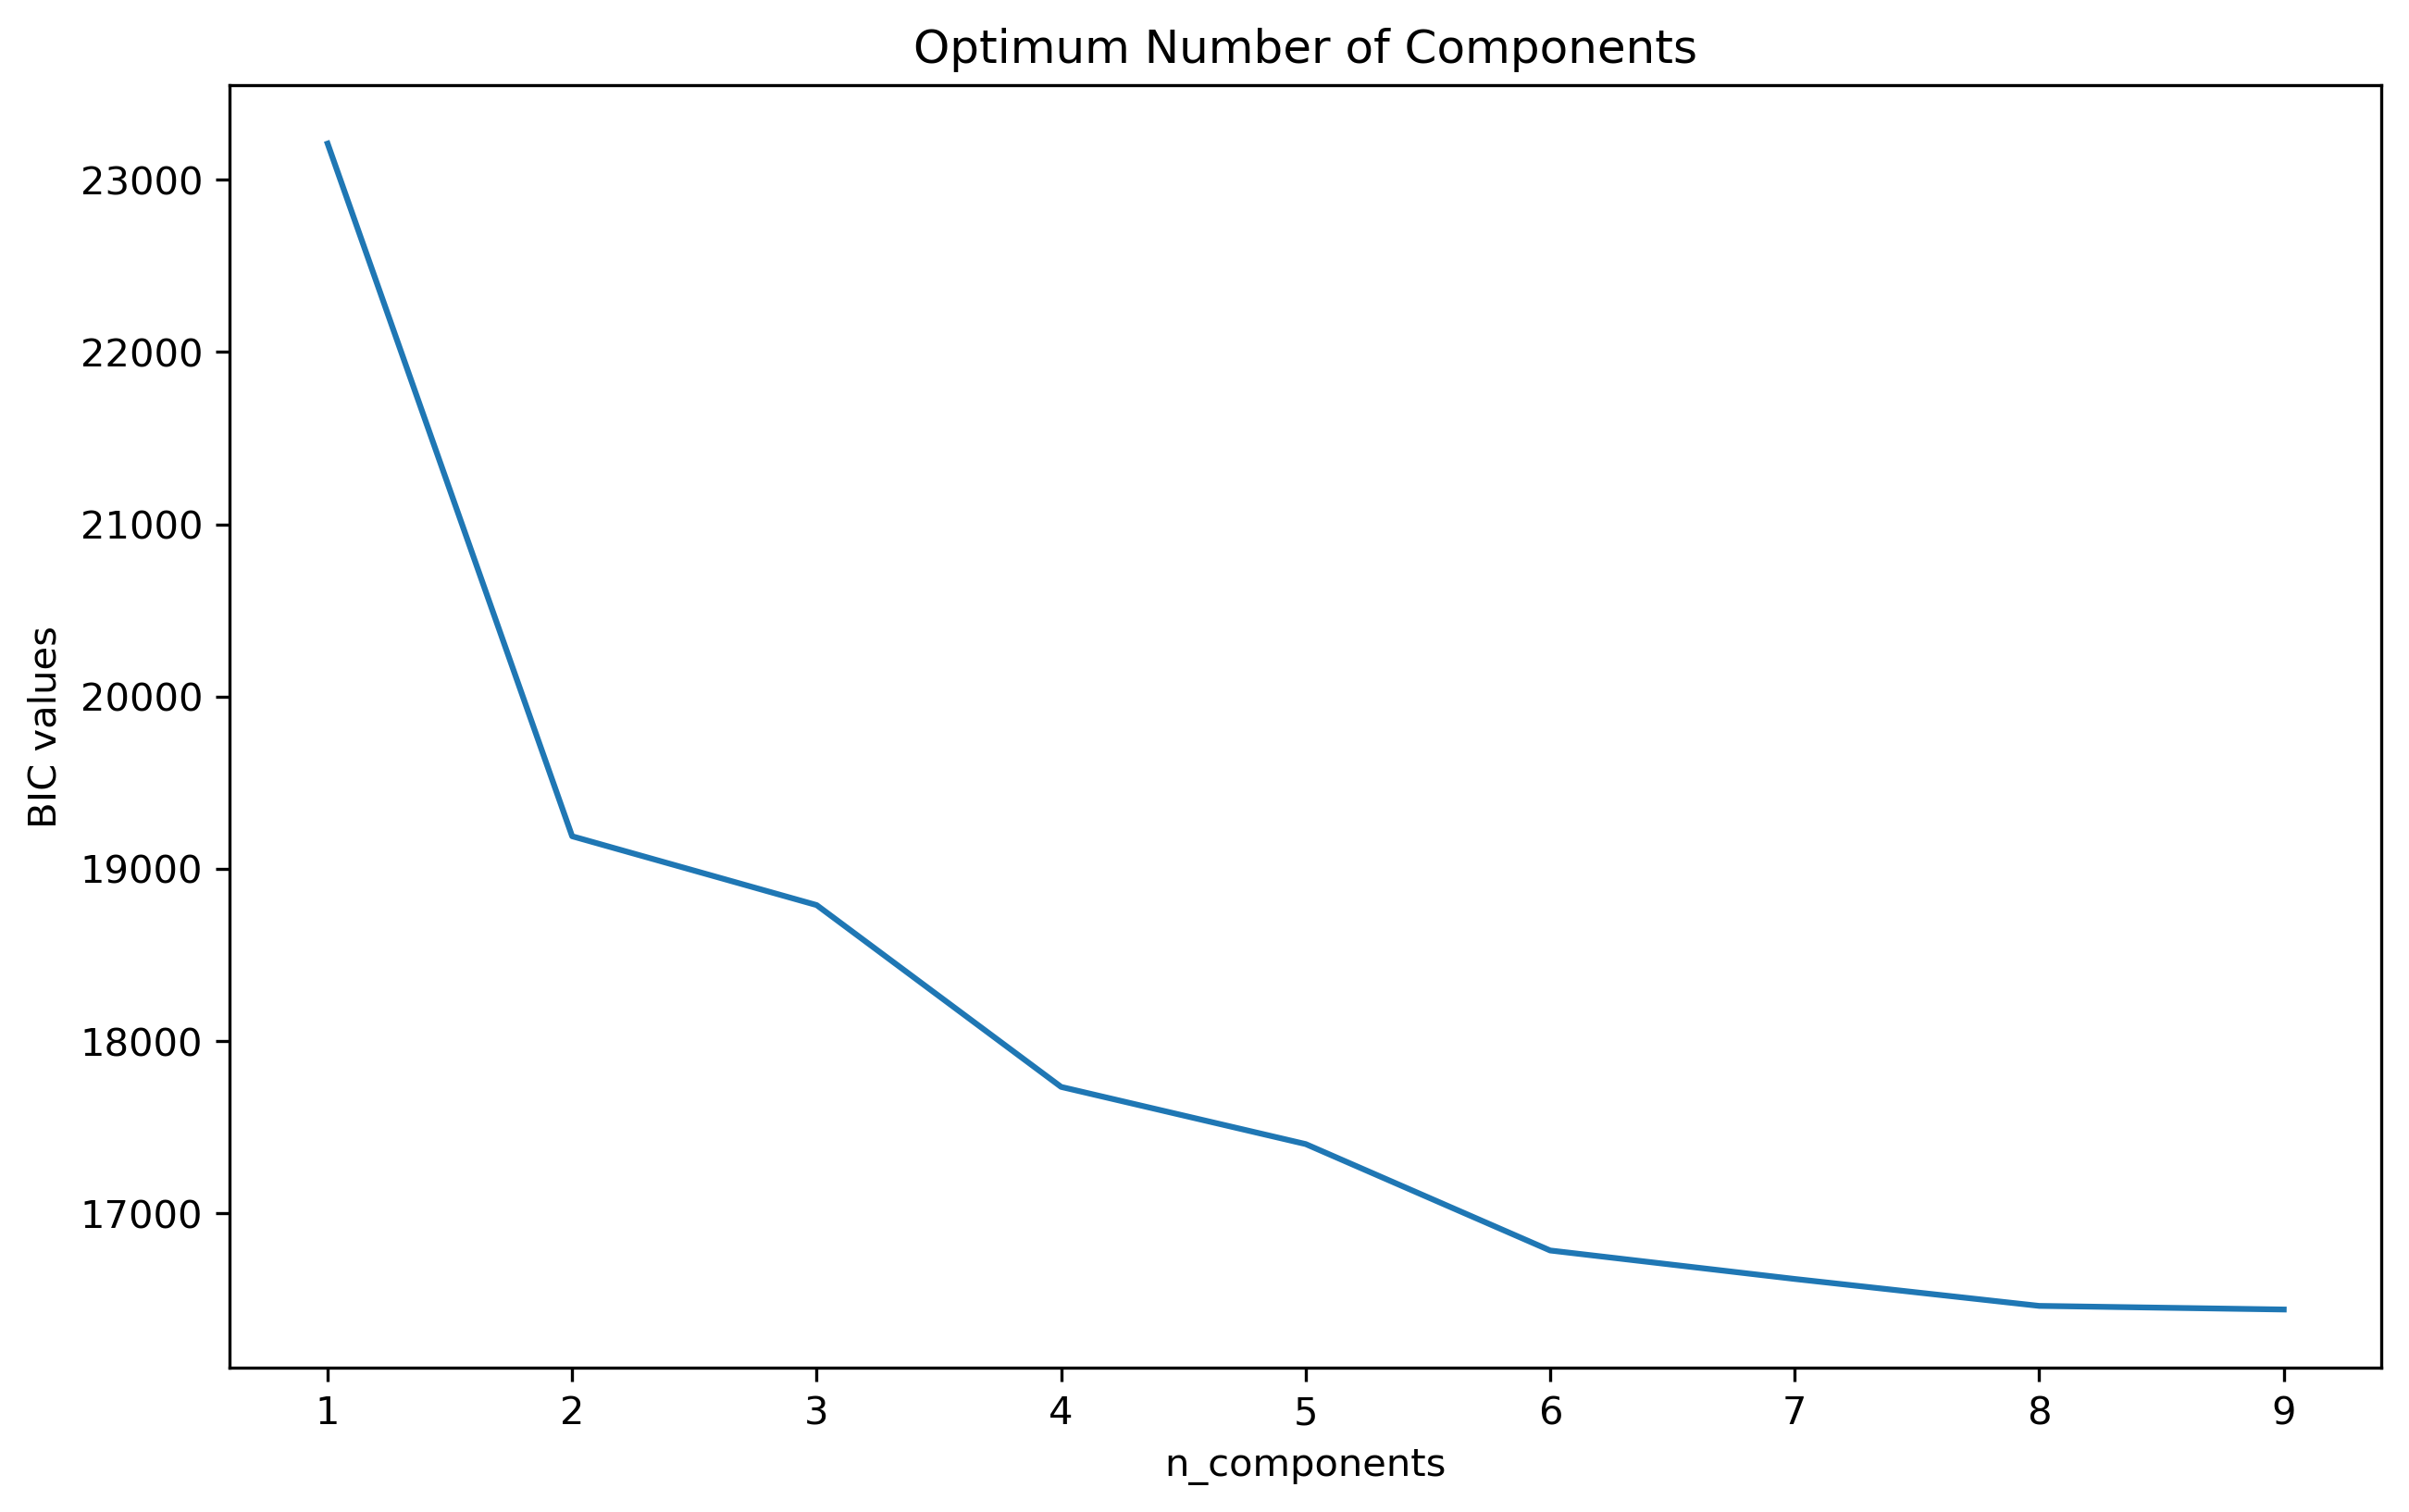

In [34]:
n_components = np.arange(1, 10)
clusters = [GaussianMixture(n, covariance_type='spherical',
                            random_state=0).fit(scaled_liq)
          for n in n_components]
plt.plot(n_components, [m.bic(scaled_liq) for m in clusters])
plt.title('Optimum Number of Components')
plt.xlabel('n_components')
plt.ylabel('BIC values')
plt.show()

이 경우 3 혹은 4에서 기울기가 거의 평평해지는 것을 확인할 수 있다. 즉, 클러스터 숫자로 3 혹은 4가 적합하다 결론내릴 수 있다. 

In [35]:
def cluster_state(data, nstates):
    gmm = GaussianMixture(n_components=nstates,
                          covariance_type='spherical',
                          init_params='kmeans')
    gmm_fit = gmm.fit(scaled_liq)
    labels = gmm_fit.predict(scaled_liq)
    state_probs = gmm.predict_proba(scaled_liq)
    state_probs_df = pd.DataFrame(state_probs, 
                                  columns=['state-1','state-2','state-3'])
    state_prob_means = [state_probs_df.iloc[:, i].mean() 
                        for i in range(len(state_probs_df.columns))]
    if np.max(state_prob_means) == state_prob_means[0]:
        print('State-1 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[0]))
    elif np.max(state_prob_means) == state_prob_means[1]:
        print('State-2 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[1]))
    else:
        print('State-3 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[2]))
    return state_probs

결과를 확인해 보면 2번째 상태가 발생할 확률이 55%로 제일 높은 것을 알 수 있다.

In [36]:
state_probs = cluster_state(scaled_liq, 3)
print(f'State probabilities are {state_probs.mean(axis=0)}')

State-1 is likely to occur with a probability of 0.736647
State probabilities are [0.73664724 0.25525559 0.00809717]


다음은 PCA를 GMM과 결합하여 사용하는 방법이다. 이는 어떤 변수가 우세한 상태와 상관관계가 있는지를 잘 파악할 수 있게 해준다. 

In [37]:
from sklearn.decomposition import PCA

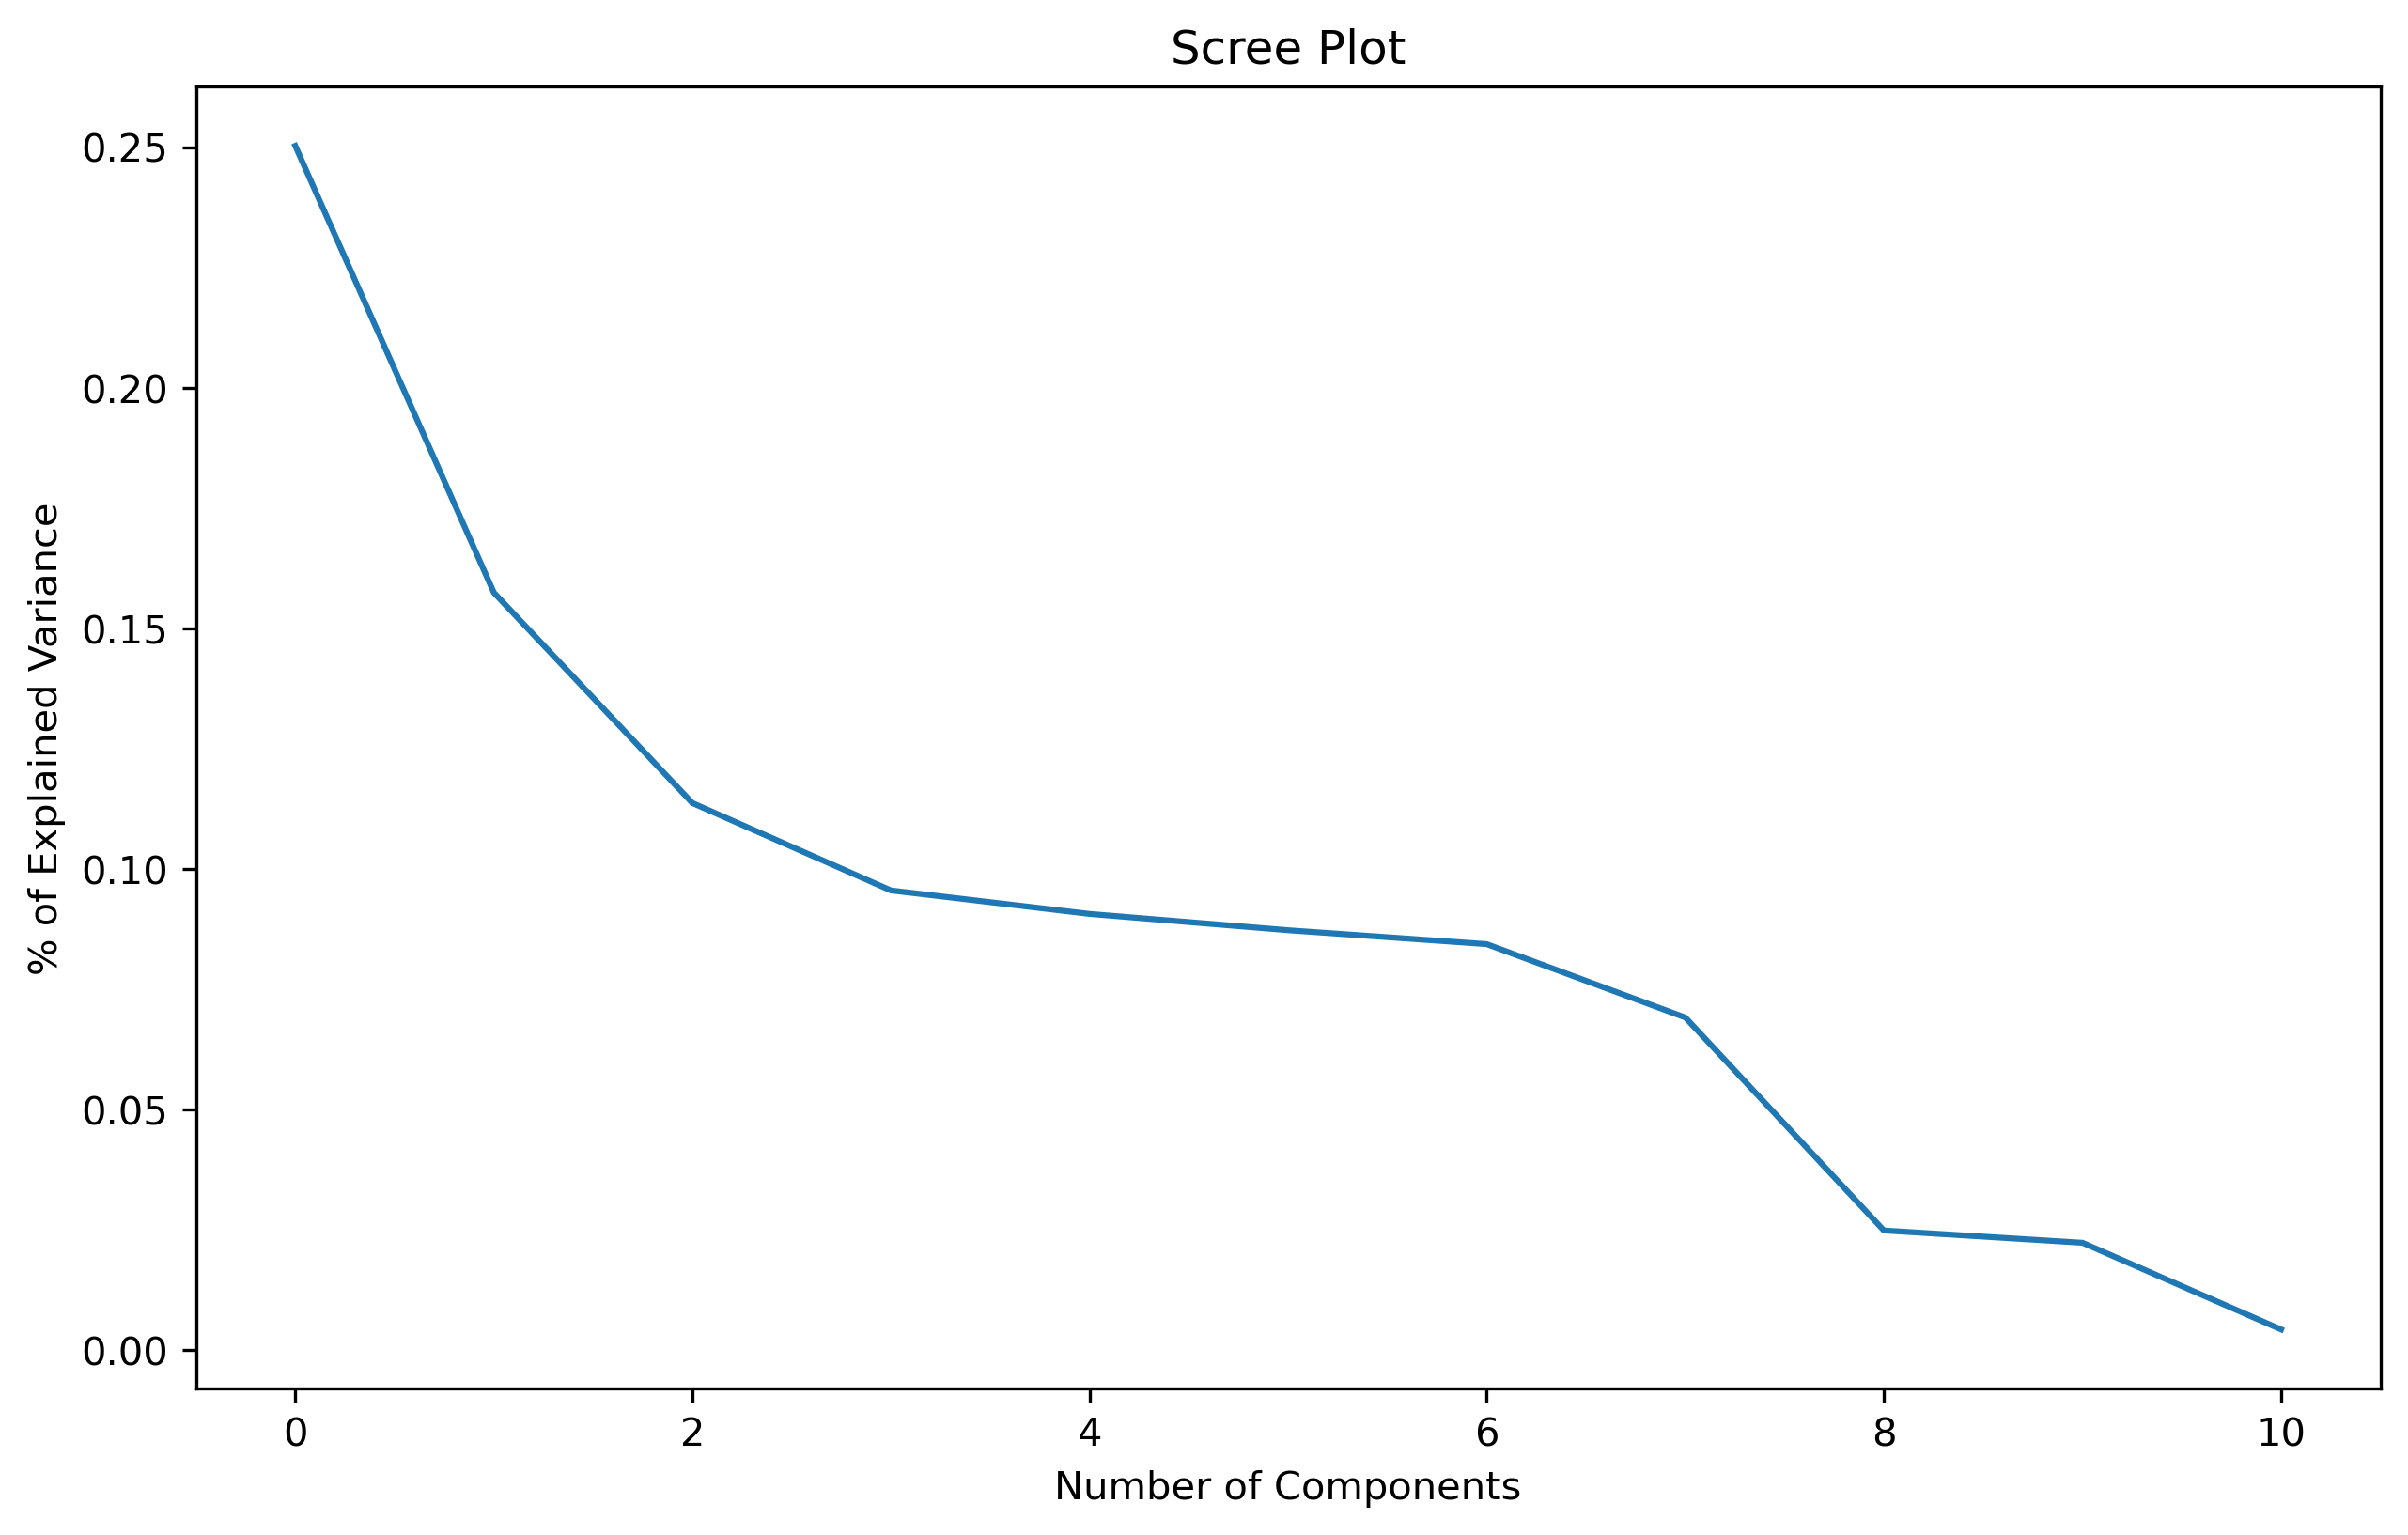

In [38]:
pca = PCA(n_components=11)
components = pca.fit_transform(scaled_liq)
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('% of Explained Variance')
plt.show()

scree plot을 사용해 본 결과, 분산의 90%를 설명하는 3이 클러스터 수로 적합한 것을 확인할 수 있다. 

In [39]:
def gmm_pca(data, nstate):
    pca = PCA(n_components=3)
    components = pca.fit_transform(data)
    mxtd = GaussianMixture(n_components=nstate,
                           covariance_type='spherical')
    gmm = mxtd.fit(components)
    labels = gmm.predict(components)
    state_probs = gmm.predict_proba(components)
    return state_probs,pca

In [40]:
state_probs, pca = gmm_pca(scaled_liq, 3)
print(f'State probabilities are {state_probs.mean(axis=0)}')

State probabilities are [0.56173551 0.06961565 0.36864884]


In [41]:
def wpc():
    state_probs_df = pd.DataFrame(state_probs,
                                  columns=['state-1', 'state-2',
                                           'state-3'])
    state_prob_means = [state_probs_df.iloc[:, i].mean() 
                        for i in range(len(state_probs_df.columns))]
    if np.max(state_prob_means) == state_prob_means[0]:
        print('State-1 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[0]))
    elif np.max(state_prob_means) == state_prob_means[1]:
        print('State-2 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[1]))
    else:
        print('State-3 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[2]))
wpc()

State-1 is likely to occur with a probability of 0.561736


다음은 loading 분석을 이용해 어떤 유동성 측정이 가장 중요한지를 확인하는 방법이다. loading 분석이란 주성분을 구성하기 위해 원래 변수에 할당된 가중치를 의미한다. 즉, 가중치가 클수록 해당 주성분에 큰 기여를 한다고 볼 수 있다.

In [42]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, 
                              columns=['PC1', 'PC2', 'PC3'],
                              index=liq_measures_all.columns)
loading_matrix

,PC1,PC2,PC3
liq_ratio,0.105784,-0.115594,0.211359
Lhh,-0.211087,0.882496,0.125763
turnover_ratio,0.600733,-0.004437,-0.017156
percent_quoted_ba,0.726828,0.135832,-0.531070
percent_effective_ba,0.657794,0.150320,-0.503888
roll,-0.078506,0.885962,0.088282
CS_spread,0.013519,-0.299057,0.108795
amihud,0.855302,-0.014431,0.478477
florackis,0.722547,0.084683,0.579748
cet,-0.039806,0.101381,-0.014979


## GMCM

GMCM은 위에서 서술된 GMM에 Copula의 개념을 적용한 모델링 기법이다. 

Copula는 주어진 다변량 분포에서 독립된 한계 분포를 산출할 수 있게 해 주는 함수이다. 이는 상관관계를 고려해 한계 분포를 산출할 수 있게 해 줘 상관관계가 중요하게 작용하는 리스크 관리 분야에서 매우 중요한 역할을 하고 있다.

$F$를 $X^d$의 한계 연속 누적분포함수(CDF)라고 하자. CDF 변환은 랜덤 변수를 [0,1]에 균일하게 분포된 스칼라에 매핑한다. 즉, copula C는 다음과 같이 정의되는 함수이다.

$$C : [0,1]^d : -> [0,1]$$ 

여기서 $d$는 한계 CDF의 수를 의미한다. 

파이썬 COPULA 라이브러리에서는 다음과 같이 구현한다. 우선 Gaussian Mixture model에 근거하여 상관관계 구조를 유도한다. M개의 component와 d차원을 가지는 Gaussian Mixture Copula의 PDF는 다음과 같이 주어진다.

$$

        \phi = \sum_i^M w_i \phi_i (x_1, x_2, \dots, x_d; \theta_i) \\

        \text{s.t.} \\

        \sum^M_i w_i = 1 \\

        0 \leq w_i \leq 1 \quad \forall i \in [1, \dots, M] \\
$$

 <center> where </center>
 
$$
        w_i = \text{weight of the marginal density} \\

        \phi_i = \text{marginal density} \\

        \theta_i = \text{parameters of the Gaussian marginal} 

$$
Gaussian Mixture Copula 는 다음과 같이 주어진다.

$$

        C(u_1, u_2, \dots, u_d; \Theta) =
            \frac{\phi(\Phi_1^{-1}(u_1), \Phi_2^{-1}(u_2), \dots, \Phi_d^{-1}(u_d); \Theta}
            {\phi_1(\Phi_1^{-1}(u_1)) \cdot \phi_2(\Phi_2^{-1}(u_2)) \cdots \phi_d(\Phi_1^{-1}(u_d))} \\
$$

 <center> where </center>

$$
        \Phi_i = \text{Inverse function of GMM marginal CDF} \\

        \Theta = (w_i, \theta_i) \forall i \in [1, \dots, M]

$$

In [43]:
from copulae.mixtures.gmc.gmc import GaussianMixtureCopula

In [44]:
_, dim = scaled_liq.shape
gmcm = GaussianMixtureCopula(n_clusters=3, ndim=dim)

In [45]:
gmcm_fit = gmcm.fit(scaled_liq, method='kmeans',
                    criteria='GMCM', eps=0.0001)
state_prob = gmcm_fit.params.prob
print(f'The state {np.argmax(state_prob) + 1} is likely to occur')
print(f'State probabilities based on GMCM are {state_prob}')

The state 2 is likely to occur
State probabilities based on GMCM are [0.33738192 0.34412955 0.31848853]
